### 실습 1 군집분석

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer 

#### Step 1. 데이터 구성하기 

In [56]:
df_raw = pd.read_csv('/home/piai/PABA_27/BigData/lecture/01 실습파일/2. Big Data 분석/IRIS.csv')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Step 2. 데이터 전처리 (표준화)

In [57]:
# 데이터 분리(Y, Xs) 
df_raw_x = df_raw.drop("SPECIES",axis=1)
df_raw_y = df_raw["SPECIES"]
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
x_cols = df_raw_x.columns
# Scale 변환 
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data :\n{}".format(nd_scaled[:5].round(3)))
print("Shape : \n{}".format(nd_scaled.shape))

Scaled Data :
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape : 
(150, 4)


#### Step 3. 계층형 군집분석 실시 

In [59]:
# 연결: ward, 거리 계산: Euclidean: ward~Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [60]:
Z_ward

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

Text(0, 0.5, 'Distance')

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


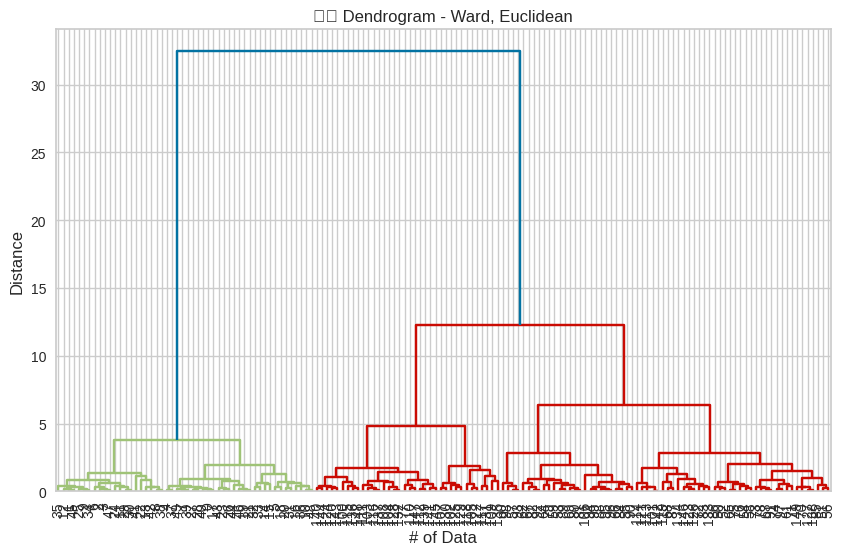

In [61]:
#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
# DataFrame 변경:Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

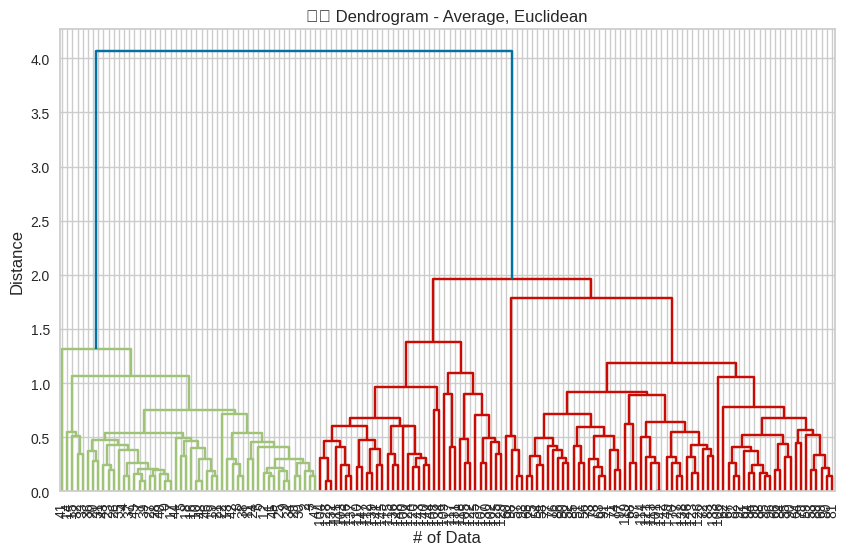

In [62]:
#덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

- 거리계산 방식은 모두 Euclidean, 연결방식은 첫번째는 ward, 두번째는 average를 사용한다. 
- 서로 다른 형태의 Dendrogram이 생성된다.

In [63]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 5, criterion="distance")
# 데이터에 계층형 군집 결과 입력
df_raw["cluster_H"] = cluster_H
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


- 군집 번호 자체는 식별자로 우선순위 등의 의미는 없다.

In [64]:
# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

/tmp/ipykernel_532423/2748034841.py:2: FutureWarning: ['SPECIES'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])


,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6
1,2,6.2,6.869,7.9,2.5,3.086,3.8,5.0,5.769,6.9,1.6,2.106,2.5
2,3,4.9,5.496,6.0,2.0,2.615,3.0,3.0,3.950,4.5,1.0,1.215,1.7
3,4,5.6,6.211,7.0,2.2,2.845,3.4,4.0,4.742,5.6,1.2,1.584,2.4


- 각 군집 별 변수 분포가 다르기 때문에 평균 등 통계량을 확인해야한다.

array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

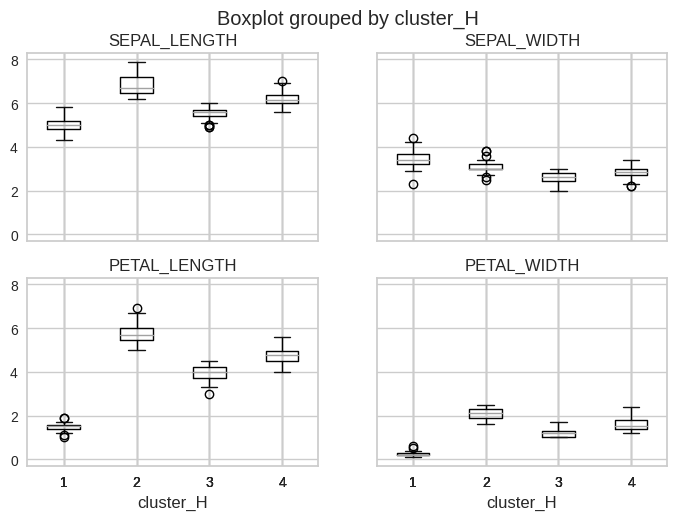

In [68]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"], by = "cluster_H")

- 2번 군집은 "SEPAL_LENGTH", "PETAL_LENGTH" 평균이 상대적으로 높다.

<Axes: xlabel='cluster_H', ylabel='count'>

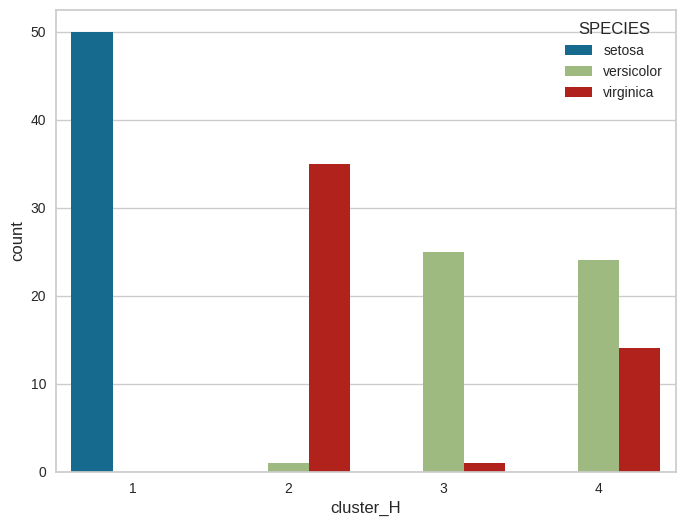

In [ ]:
# countplot을 통한 목표변수 분포 확인. (범주형)
# countplot을 사용하여 cluster_H에 따른 Species 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x="cluster_H", hue="SPECIES", data=df_raw)

- 1번 군집은 모두 setora로 분류되었다. PETAL_LENGTH, PETAL_WIDTH이 작은 데이터들은 setora로 분류된다. 
- 2번 군집은 대부분 virginica로 분류되었다. SEPAL_LENGTH와 PETAL_LENGTH의 평균이 높은 데이터들은 virginica로 분류된다. 

#### Step 4. K-평균 군집분석 실시 

In [ ]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

,NumberofCluster,Error
0,1,681.371
1,2,152.348
2,3,78.851
3,4,57.256
4,5,46.446
5,6,39.040
6,7,34.422
7,8,30.063
8,9,27.983
9,10,26.102


- Error: 군집 중심~군집 내 자료 간의 거리 제곱 (Sum of Square)
- 군집 수가 증가함에 따라 각 군집의 중심점과 해당 군집의 자료 간의 거리는 줄어든다.

Text(0, 0.5, 'Sum of Square')

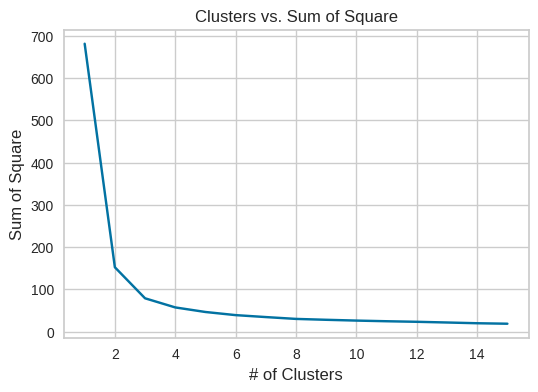

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

- 그래프를 통해 적절한 군집 수를 결정할 수 있다. 
- 군집이 2,3개일때부터 에러가 감소하기 시작한다. 우선적으로 군집을 4개로 설정한다.

In [ ]:
clus = KMeans(4)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10) 

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H,cluster_KM
0,5.1,3.5,1.4,0.2,setosa,1,2
1,4.9,3.0,1.4,0.2,setosa,1,2
2,4.7,3.2,1.3,0.2,setosa,1,2
3,4.6,3.1,1.5,0.2,setosa,1,2
4,5.0,3.6,1.4,0.2,setosa,1,2
5,5.4,3.9,1.7,0.4,setosa,1,2
6,4.6,3.4,1.4,0.3,setosa,1,2
7,5.0,3.4,1.5,0.2,setosa,1,2
8,4.4,2.9,1.4,0.2,setosa,1,2
9,4.9,3.1,1.5,0.1,setosa,1,2


In [ ]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

/tmp/ipykernel_532423/3310844571.py:2: FutureWarning: ['SPECIES'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  groupby("cluster_KM").agg(["min", "mean", "max"])


,cluster_KM,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,5.6,6.252,7.0,2.2,2.855,3.4,4.3,4.815,5.6,1.2,1.625,2.4
1,2,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6
2,3,6.2,6.913,7.9,2.5,3.100,3.8,5.1,5.847,6.9,1.6,2.131,2.5
3,4,4.9,5.532,6.1,2.0,2.636,3.0,3.0,3.961,4.5,1.0,1.229,1.7


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_KM'>]],
      dtype=object)

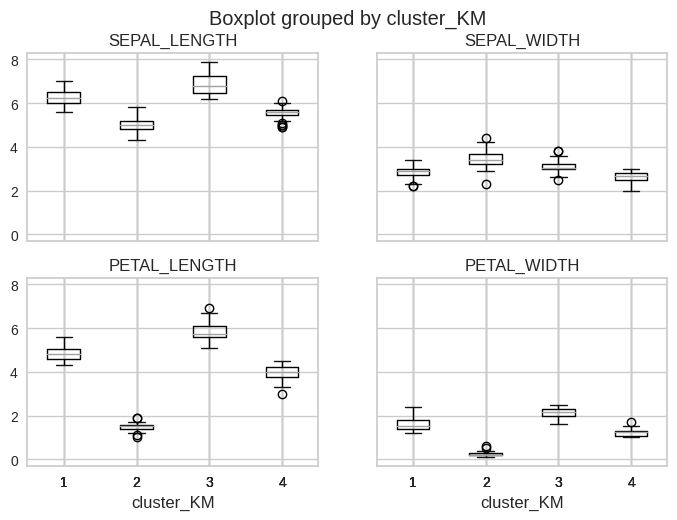

In [ ]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_KM")

<Axes: xlabel='cluster_KM', ylabel='count'>

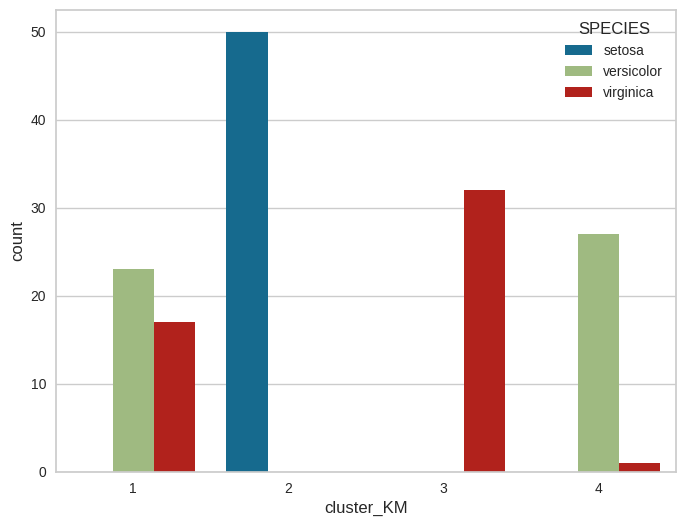

In [ ]:
# countplot을 통한 목표변수 분포 확인.
# countplot을 사용하여 cluster_H에 따른 Species 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x="cluster_KM", hue="SPECIES", data=df_raw)

In [ ]:
# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출:sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.554
계층형(군집 수=4) 실루엣 계수 =  0.489


In [ ]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수 =  0.553
k-평균(군집 수=4) 실루엣 계수 =  0.497


/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- 실루엣 계수가 높을수록(1에 가까울수록) 군집이 효율적으로 형성되었다고 판단된다. 
- K-means 군집분석의 실루엣 계수는 실행시 마다 값이 달라질 수 있다.  (초기 seed 변화 때문이다)

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

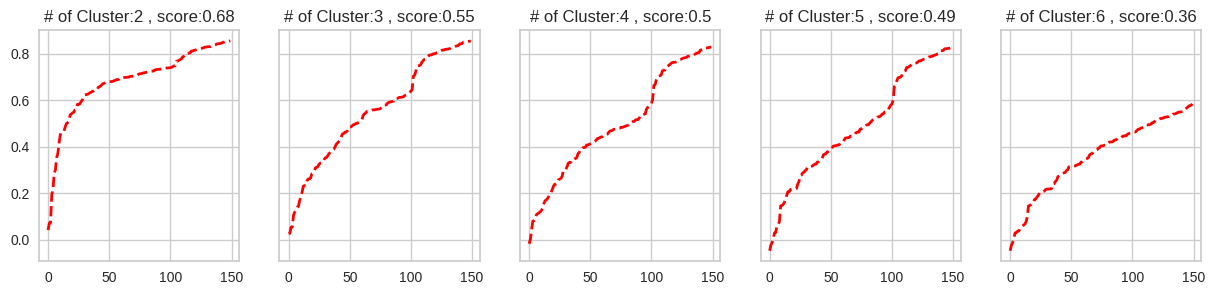

In [ ]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)

for i, ax in enumerate(axes):
#     cluster_nums = AgglomerativeClustering(n_clusters=i+2).fit_predict(df_raw_x)
    cluster_nums = KMeans(n_clusters=i+2).fit_predict(df_raw_x)
    
    sil_samples = silhouette_samples(df_raw_x, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_raw_x, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("# of Cluster:{} , score:{}".format(round(i+2), format(round(sil_score, 2))))
plt.savefig('../sil_of_cluster.svg')
plt.show()

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


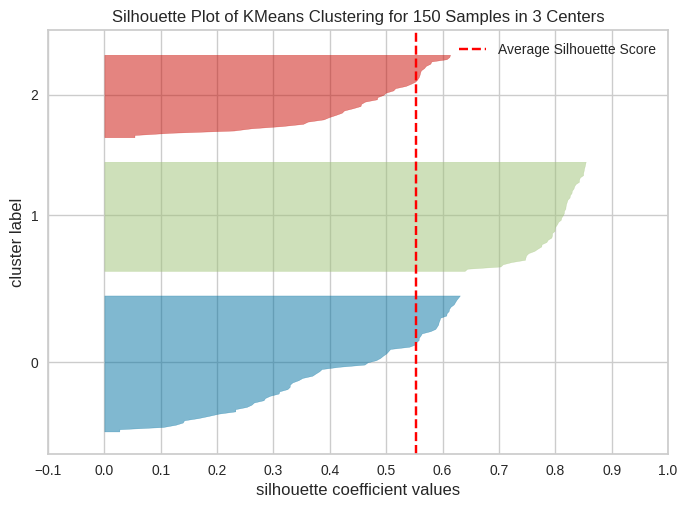

실루엣 계수 =  0.5528


In [ ]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


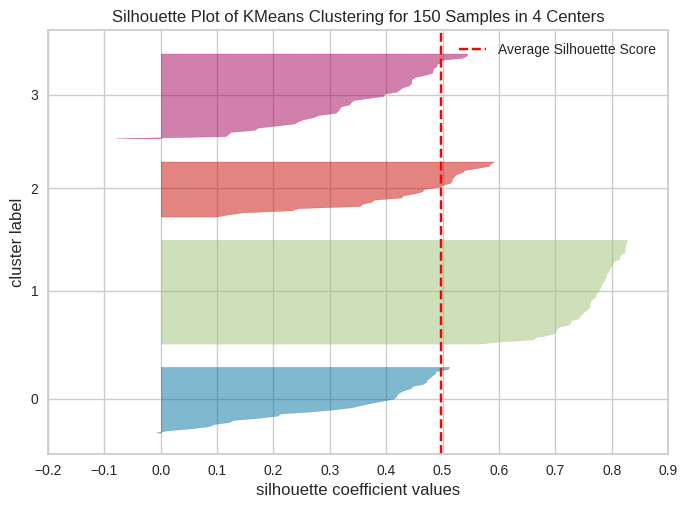

실루엣 계수 =  0.4975


In [ ]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


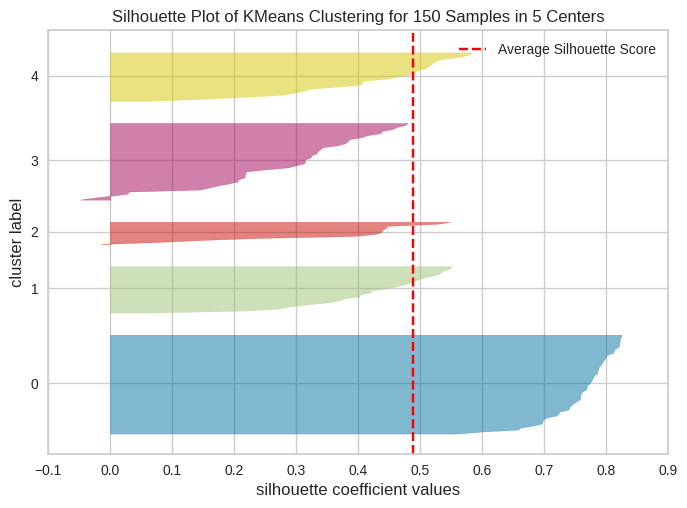

실루엣 계수 =  0.4887


In [ ]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

#### Step 5. DBSCAN 군집 분석 

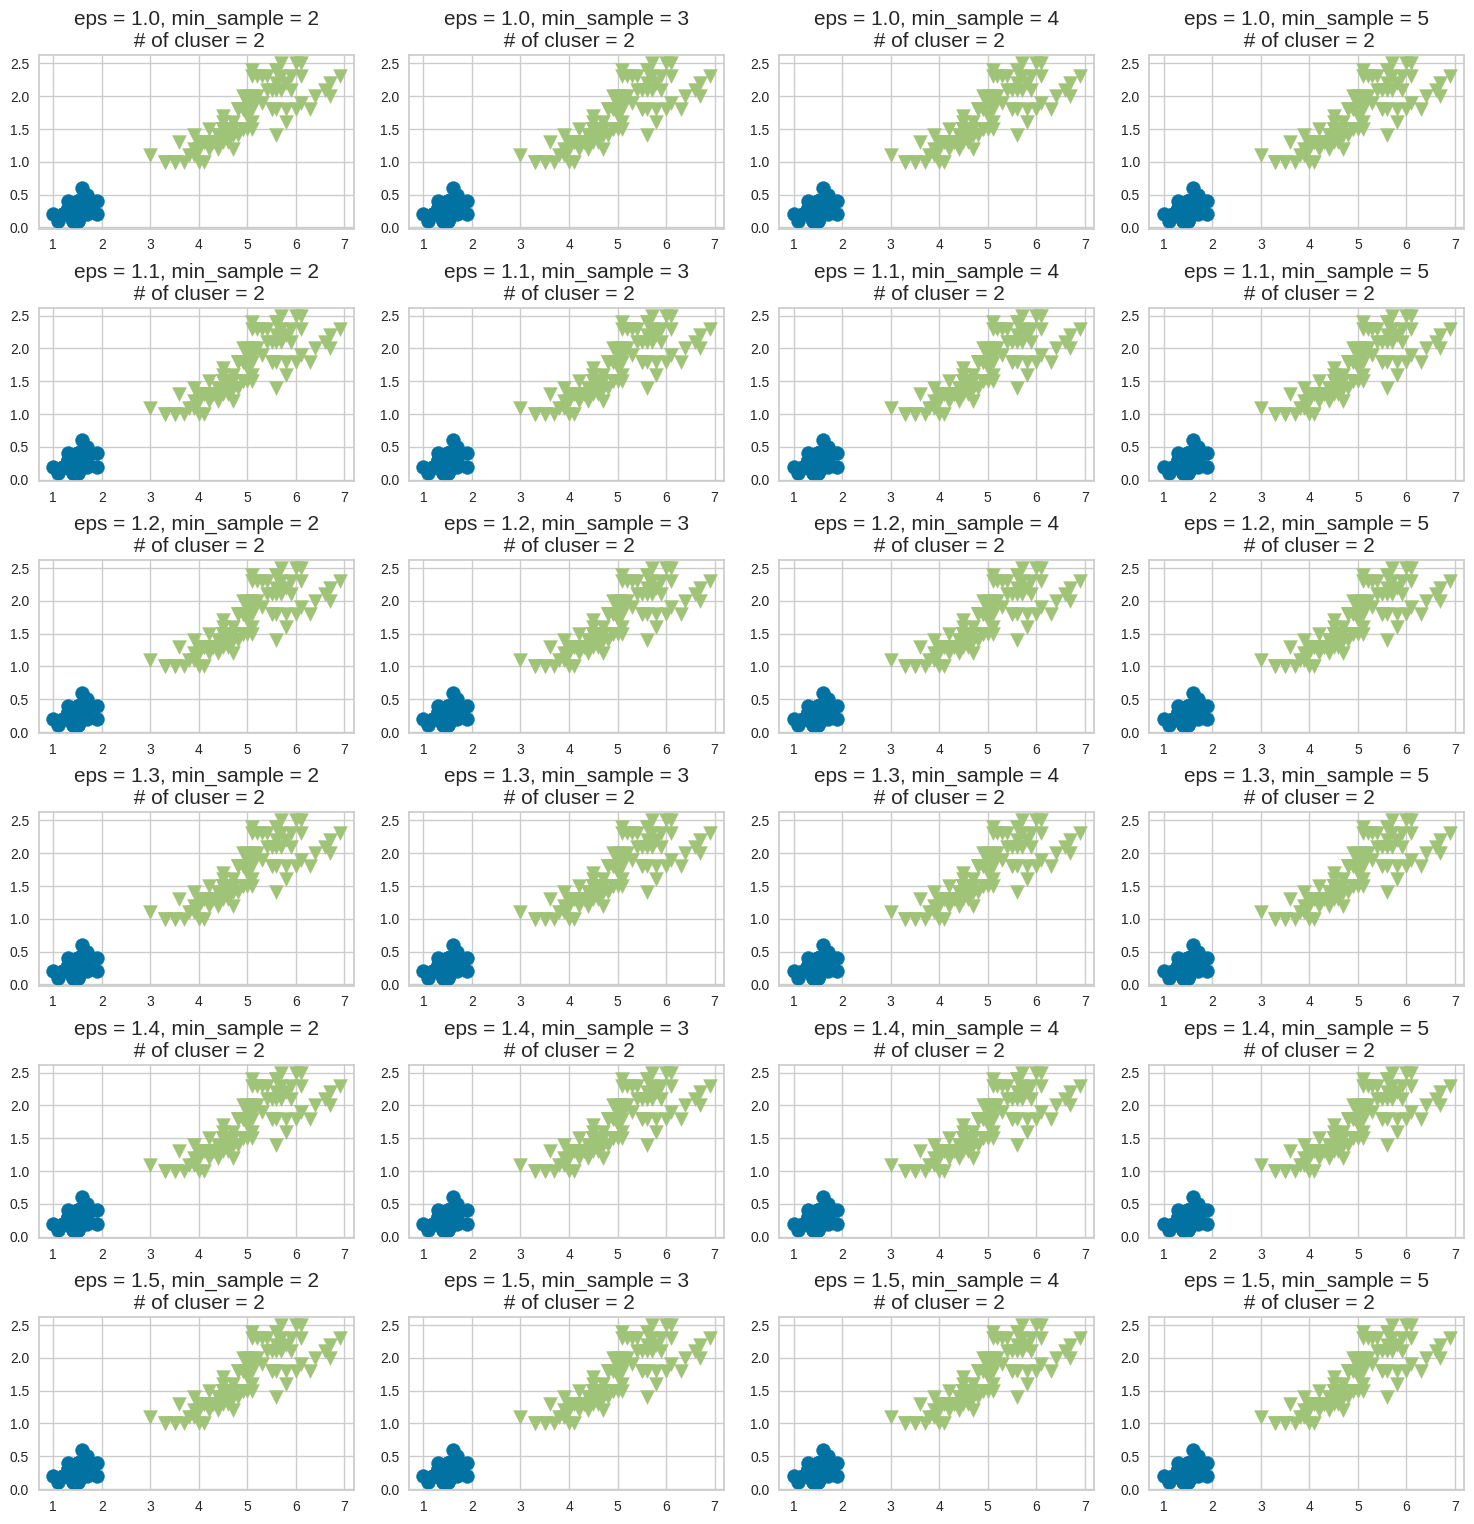

In [ ]:
# X축: PETAL_LENGTH 변수, Y축: PETAL_WIDTH
X = df_raw["PETAL_LENGTH"]
Y = df_raw["PETAL_WIDTH"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)


In [ ]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
# 군집 결과
cluster_DB = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_DB):
    if val < 0:
        cluster_DB[i] = 0
    else:
        cluster_DB[i] = cluster_DB[i] + 1
df_raw["cluster_DB"] = cluster_DB
df_raw.head()


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H,cluster_KM,cluster_DB
0,5.1,3.5,1.4,0.2,setosa,1,2,1
1,4.9,3.0,1.4,0.2,setosa,1,2,1
2,4.7,3.2,1.3,0.2,setosa,1,2,1
3,4.6,3.1,1.5,0.2,setosa,1,2,1
4,5.0,3.6,1.4,0.2,setosa,1,2,1


In [ ]:
# DB 스캔 군집별 요약 통계량
df_summary_DB = df_raw.drop(["cluster_H", "cluster_KM"],
                                   axis = 1,
                                   inplace=False).\
                groupby("cluster_DB").agg(["min", "mean", "max"])
level0 = df_summary_DB.columns.get_level_values(0)
level1 = df_summary_DB.columns.get_level_values(1)
df_summary_DB.columns = level0 + "_" + level1
df_summary_DB.reset_index(inplace = True)
df_summary_DB.round(3)

/tmp/ipykernel_532423/4214206711.py:5: FutureWarning: ['SPECIES'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  groupby("cluster_DB").agg(["min", "mean", "max"])


,cluster_DB,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6
1,2,4.9,6.262,7.9,2.0,2.872,3.8,3.0,4.906,6.9,1.0,1.676,2.5


### 실습 2 연관규칙 

In [ ]:
%pip install mlxtend
%pip install apriori

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2454 sha256=950c08f61a6dcbbdf39a914bee33bc3e658e42ef679395b6f89a8b01844a4d6b
  Stored in directory: /home/piai/.cache/pip/wheels/8c/fa/83/25b9cb17d884f97f2e62d97d0818bbed8117e89a6b09c37dc3
Successfully built apriori
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Step 1. 데이터 구성하기 

In [ ]:
df_raw = pd.read_csv("/home/piai/PABA_27/BigData/lecture/01 실습파일/2. Big Data 분석/구매이력.csv", encoding = 'euc-kr')
df_raw.head(10)

,ID,PRODUCT
0,CS-102,양주
1,CS-102,양주
2,CS-103,소다
3,CS-103,크래커
4,CS-103,맥주
5,CS-104,크래커
6,CS-104,맥주
7,CS-106,양주
8,CS-106,크래커
9,CS-107,맥주


In [ ]:
# 고객 ID 리스트 행성 및 정렬
ID = list(set(df_raw["ID"]))
ID.sort()

# 고객ID별 상품 매칭
list_association = []
for i in ID:
    # ID별 구매 데이터 추출
    tmp_list = list(df_raw[df_raw["ID"] == i]["PRODUCT"])
    tmp_list.sort()
    # ID별 구매 데이터를 리스트에 담기
    list_association.append(tmp_list)

# 리스트 출력
for row in list_association:
    print(row)

['양주', '양주']
['맥주', '소다', '크래커']
['맥주', '크래커']
['양주', '크래커']
['맥주', '콜라']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['맥주', '콜라']
['맥주', '양주', '콜라']
['맥주', '소다', '양주', '크래커']
['양주']
['맥주', '콜라']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다']
['소다', '양주', '크래커']
['크래커']
['양주', '콜라']
['맥주', '소다', '양주', '콜라', '크래커']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['양주', '콜라', '크래커']
['맥주', '콜라']
['맥주', '크래커']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '콜라']
['맥주', '콜라', '크래커']
['맥주', '양주']
['맥주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['소다', '양주', '콜라']
['맥주', '크래커']
['소다', '크래커']


In [ ]:
# Items 기준으로 포함 여부에 따라 True/False 로 변환
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = list_association)

# 함수 fit_transform 는 데이터를 행렬의 형태로 반환, pandas의 DataFrame의 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)

df_asso.head()

,맥주,소다,양주,콜라,크래커
0,False,False,True,False,False
1,True,True,False,False,True
2,True,False,False,False,True
3,False,False,True,False,True
4,True,False,False,True,False


In [ ]:
list_association

[['양주', '양주'],
 ['맥주', '소다', '크래커'],
 ['맥주', '크래커'],
 ['양주', '크래커'],
 ['맥주', '콜라'],
 ['맥주'],
 ['맥주', '소다', '양주', '크래커'],
 ['맥주'],
 ['맥주', '콜라'],
 ['맥주', '콜라'],
 ['맥주', '양주', '콜라'],
 ['맥주', '소다', '양주', '크래커'],
 ['양주'],
 ['맥주', '콜라'],
 ['양주', '콜라'],
 ['맥주', '크래커'],
 ['맥주', '소다', '양주', '크래커'],
 ['맥주', '소다', '양주', '크래커'],
 ['맥주', '소다'],
 ['소다', '양주', '크래커'],
 ['크래커'],
 ['양주', '콜라'],
 ['맥주', '소다', '양주', '콜라', '크래커'],
 ['양주', '콜라'],
 ['맥주', '크래커'],
 ['맥주', '소다', '크래커'],
 ['맥주', '소다', '양주', '크래커'],
 ['맥주'],
 ['맥주', '콜라'],
 ['양주', '콜라', '크래커'],
 ['맥주', '콜라'],
 ['맥주', '크래커'],
 ['맥주'],
 ['맥주', '소다', '양주', '크래커'],
 ['맥주', '소다', '콜라'],
 ['맥주', '콜라', '크래커'],
 ['맥주', '양주'],
 ['맥주', '콜라'],
 ['맥주', '크래커'],
 ['맥주', '소다', '양주', '크래커'],
 ['소다', '양주', '콜라'],
 ['맥주', '크래커'],
 ['소다', '크래커']]

#### Step 2. 연관규칙 분석 

In [ ]:
# 규칙 선택 최소 지지
v_min_support = 0.3

# 연관규칙 생성 및 지지도 임계값 적용
# df_freq = apriori(df_asso, min_support = 0.4, use_colnames = True)  # 직접 입력 
df_freq = apriori(df_asso, min_support = v_min_support, use_colnames = True) # 매개값 사용

# itemsets 항목 확인
df_freq.round(3) 
# df_freq[9:16].round(3) # 부분 확인

,support,itemsets
0,0.744,(맥주)
1,0.349,(소다)
2,0.442,(양주)
3,0.372,(콜라)
4,0.512,(크래커)
5,0.395,"(맥주, 크래커)"


In [ ]:
#향상도 기준 : lift
df_asso_rule = association_rules(df_freq, metric="lift" ,min_threshold = 0.1)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(크래커),0.744,0.512,0.395,0.531,1.038,0.015,1.042,0.144
1,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076


In [ ]:
#신뢰도 기준:confidence
df_asso_rule = association_rules(df_freq, metric="confidence" ,min_threshold = 0.1)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(크래커),0.744,0.512,0.395,0.531,1.038,0.015,1.042,0.144
1,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076


#### Step 3. 결론 도출